In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('electricity_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year == 2021]
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(3)

,Date,Total_Consumption
0,2021-01-01,7.7
1,2021-01-02,8.5
2,2021-01-03,7.7


In [ ]:
df.tail()

,Date,Total_Consumption
198,2021-07-26,26.1
199,2021-07-27,24.3
200,2021-07-28,23.4
201,2021-07-29,16.8
202,2021-07-30,16.8


In [ ]:
df.shape

(203, 2)

In [ ]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt

actual_vals = df.Total_Consumption.values
actual_log = np.log10(actual_vals)

train, test = actual_vals[0:-80], actual_vals[-80:]
train_log, test_log = np.log10(train), np.log10(test)
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 7)

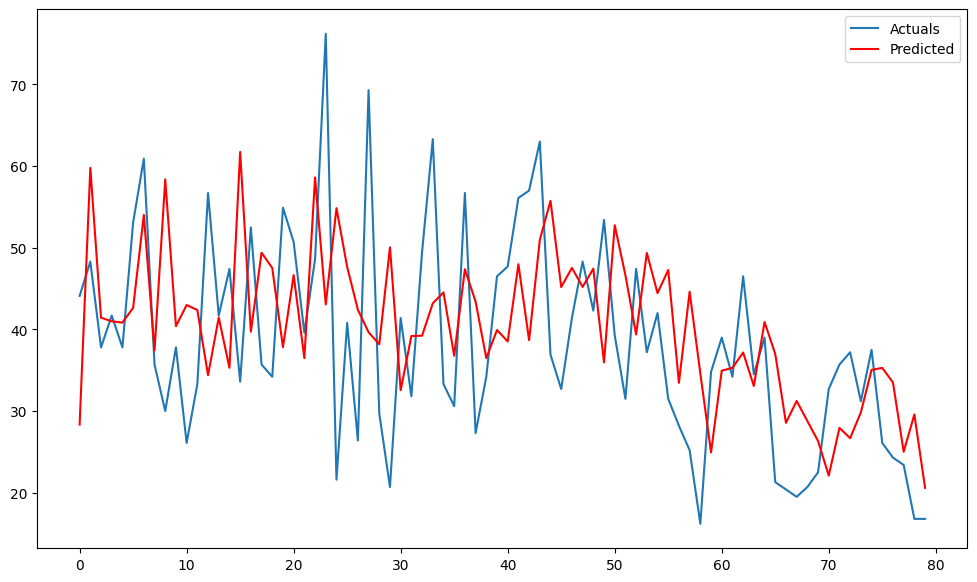

In [ ]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
   # print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
df_preds = df[-80:]
df_preds['Predicted_Consumption'] = predictions

In [ ]:
import plotly.graph_objects as go
import plotly.offline as py

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_preds['Date'], y=df_preds['Total_Consumption'],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=df_preds['Date'], y=df_preds['Predicted_Consumption'],
                    mode='lines',
                    name='lines'))

In [ ]:
new_dates = pd.date_range(start='2021/07/31', end='2021/09/30')

In [ ]:
train = df.Total_Consumption.values

my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 62)

model = sm.tsa.SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit()
output = model_fit.forecast(62)

In [ ]:
listofzeros = [np.NaN] * 62

In [ ]:
data_new = {'Date':new_dates,
            'Total_Consumption':listofzeros,
            'Predicted_Consumption':output}

df_new_preds = pd.DataFrame(data_new)

In [ ]:
df_all = pd.concat([df_preds, df_new_preds], ignore_index=True)

In [ ]:
df_all.head(2)

,Date,Total_Consumption,Predicted_Consumption
0,2021-05-09,44.1,28.343530
1,2021-05-10,48.3,59.779649


In [ ]:
df_all['MAE'] = df_all['Total_Consumption'] - df_all['Predicted_Consumption']

### Threshold: 5

In [ ]:
df_anoms = df_all[df_all['MAE'] >= 5]
df_anoms.reset_index(drop=True, inplace=True)

In [ ]:
df_anoms.tail(2)

,Date,Total_Consumption,Predicted_Consumption,MAE
23,2021-07-22,35.7,27.940855,7.759145
24,2021-07-23,37.2,26.676932,10.523068


In [ ]:
df_anoms['extra_MAE'] = df_anoms['MAE'] - 5

In [ ]:
df_anoms['extra_MAE_cost'] = df_anoms['extra_MAE']*9

In [ ]:
df_anoms.groupby(df_anoms['Date'].dt.month)['extra_MAE_cost'].sum()

,extra_MAE_cost
Date,
5,561.337847
6,1107.062300
7,234.804402


In [ ]:
df_all.groupby(df_all['Date'].dt.month)['Total_Consumption'].sum().reset_index()['Total_Consumption']*7

,Total_Consumption
0,6535.2
1,8862.0
2,6113.1
3,0.0
4,0.0


In [ ]:
180/2300 # 8-15%

0.0782608695652174

### Threshold: 10

In [ ]:
df_anoms = df_all[df_all['MAE'] >= 10]
df_anoms.reset_index(drop=True, inplace=True)

In [ ]:
df_anoms.tail(2)

,Date,Total_Consumption,Predicted_Consumption,MAE
13,2021-07-21,32.7,22.096933,10.603067
14,2021-07-23,37.2,26.676932,10.523068


In [ ]:
df_anoms['extra_MAE'] = df_anoms['MAE'] - 10

In [ ]:
df_anoms['extra_MAE_cost'] = df_anoms['extra_MAE']*9

In [ ]:
df_anoms.groupby(df_anoms['Date'].dt.month)['extra_MAE_cost'].sum()

,extra_MAE_cost
Date,
5,274.434687
6,638.765794
7,10.135217


In [ ]:
df_all.groupby(df_all['Date'].dt.month)['Total_Consumption'].sum().reset_index()['Total_Consumption']*7

,Total_Consumption
0,6535.2
1,8862.0
2,6113.1
3,0.0
4,0.0


In [ ]:
638/8862 # 8-15%

0.0719927781539156

### Threshold: 12

In [ ]:
df_anoms = df_all[df_all['MAE'] >= 12]
df_anoms.reset_index(drop=True, inplace=True)

In [ ]:
df_anoms.tail(2)

,Date,Total_Consumption,Predicted_Consumption,MAE
9,2021-06-23,63.0,50.950536,12.049464
10,2021-06-29,53.4,35.954956,17.445044


In [ ]:
df_anoms['extra_MAE'] = df_anoms['MAE'] - 12

In [ ]:
df_anoms['extra_MAE_cost'] = df_anoms['extra_MAE']*9

In [ ]:
df_anoms.groupby(df_anoms['Date'].dt.month)['extra_MAE_cost'].sum()

,extra_MAE_cost
Date,
5,180.306032
6,528.334640


In [ ]:
df_all.groupby(df_all['Date'].dt.month)['Total_Consumption'].sum().reset_index()['Total_Consumption']*7

,Total_Consumption
0,6535.2
1,8862.0
2,6113.1
3,0.0
4,0.0


In [ ]:
180/2300 # 8-15%

0.0782608695652174